#   - - - - - - - - - - - - - - - - - - - Data Analysis : Avito.ma - - - - - - - - - - - - - - - - - - - 

### Importing libraries :

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Downloading the dataset :

In [4]:
# Read excel file into a pandas dataframe :
data=pd.read_excel(r"D:\INPT2\Machine Learning\Data Extraction - Avito\avito_Dataset.xlsx")

In [5]:
# Take a look at the first few rows :
data.head()

,Unnamed: 0,Product_name,Product_id,Product_Category,price,Phone_number,Professional_Publication,Region_address,Local_address
0,0,"""chambre a coucher ""","""40008817""","""Meubles et décoration """,1 800,"""0693178738""","""private""","""Grand Casablanca""","""Casablanca"""
1,1,"""Comte free fire""","""40008816""","""Jeux vidéo et consoles """,,"""0620119595""","""private""","""Grand Casablanca""","""Casablanca"""
2,2,"""Iphone 6 plus""","""40008815""","""Téléphones """,,"""0634415314""","""private""","""Grand Casablanca""","""Casablanca"""
3,3,"""Renault ""","""40008814""","""Voitures """,,"""0675638867""","""private""","""Chaouia-Ouardigha""","""Settat"""
4,4,"""PS3 SLIM 360 GB ""","""40008812""","""Jeux vidéo et consoles """,1 400,"""0600087439""","""private""","""Rabat-Salé-Zemmour-Zaër""","""Sala Al-Jadida"""


In [6]:
#dimension of the dataset :
print("dimension=",data.shape)

dimension= (4350, 9)


## Data Cleaning :

In [7]:
#Drop the "Unnamed: 0" column
data=data.drop(["Unnamed: 0"],axis=1) 

In [8]:
#Cleaning the product price column : 
for i in range (len(data["price"])):
        
        if data.loc[i,"price"]=='\xa0':        
                data.loc[i,"price"]=np.nan     
        else :                    
            data.loc[i,"price"] =float( str(data.loc[i,"price"]).replace(' ',''))   

In [9]:
#Cleaning the others columns :

for i in range(len(data["Product_name"])):  
    data.loc[i,"Product_name"]=data.loc[i,"Product_name"][1:-1] 
    data.loc[i,"Product_Category"]=data.loc[i,"Product_Category"][1:-1]
    data.loc[i,"Product_id"]=data.loc[i,"Product_id"][1:-1]      
    data.loc[i,"Phone_number"]=data.loc[i,"Phone_number"][1:-1]
    data.loc[i,"Region_address"]=data.loc[i,"Region_address"][1:-1]
    data.loc[i,"Local_address"]=data.loc[i,"Local_address"][1:-1]
    
    if data.loc[i,"Professional_Publication"]=='"private"':
        data.loc[i,"Professional_Publication"]="False"
    else:
        data.loc[i,"Professional_Publication"]="True" 

In [10]:
data["Product_id"].astype(int)                   
data["Professional_Publication"].astype(bool)   
data["Product_Category"].astype('category')     
data.info()                                     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4350 entries, 0 to 4349
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Product_name              4350 non-null   object
 1   Product_id                4350 non-null   object
 2   Product_Category          4350 non-null   object
 3   price                     3129 non-null   object
 4   Phone_number              4350 non-null   object
 5   Professional_Publication  4350 non-null   object
 6   Region_address            4350 non-null   object
 7   Local_address             4350 non-null   object
dtypes: object(8)
memory usage: 272.0+ KB


In [11]:
data.describe() 

,Product_name,Product_id,Product_Category,price,Phone_number,Professional_Publication,Region_address,Local_address
count,4350,4350,4350,3129.0,4350,4350,4350,4350
unique,3489,3739,45,525.0,2104,2,16,124
top,Renault,39235089,Voitures,300.0,0627799274,False,Grand Casablanca,Casablanca
freq,18,3,654,107.0,123,2688,1355,1272


In [12]:
messing_data=data[data["price"].isna()]  
data=data.dropna(axis=0)                 

In [13]:
data.head()                              

,Product_name,Product_id,Product_Category,price,Phone_number,Professional_Publication,Region_address,Local_address
0,chambre a coucher,40008817,Meubles et décoration,1800.0,0693178738,False,Grand Casablanca,Casablanca
4,PS3 SLIM 360 GB,40008812,Jeux vidéo et consoles,1400.0,0600087439,False,Rabat-Salé-Zemmour-Zaër,Sala Al-Jadida
5,Need For Speed Heat Xbox One Neuf,39955729,Jeux vidéo et consoles,549.0,0661391011,True,Grand Casablanca,Casablanca
7,Nikel,40008809,Voitures,75000.0,0648158142,False,Gharb-Chrarda-Beni Hssen,Kénitra
8,compte free fire,40008808,Jeux vidéo et consoles,170.0,0645595258,False,Grand Casablanca,Casablanca


# Data Analysis and Visualization :

# Etudes statistique par rapport aux nombres d'annonces  :

#### 1)nombre des annonces dans avito dataset

In [14]:
#Nombre total des annonces :
nbr_products=data["Product_name"].count()
print("Nombre total des annonces :",nbr_products)

Nombre total des annonces : 3129


In [15]:
# max et min des prix dans notre dataset :
data[["price"]].agg(["max","min"])

,price
max,145000000.0
min,1.0


<AxesSubplot:title={'center':'Perscentage des des Publication professionnel'}, ylabel='Professional_Publication'>

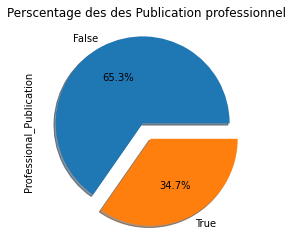

In [16]:
#Perscentage des Publication professionnel dans notre dataset
data["Professional_Publication"].value_counts().plot.pie( title="Perscentage des des Publication professionnel", \
                   autopct='%1.1f%%', explode=(0.1, 0.1), \
                   shadow=True)

#### 2) nombre des annonces dans chaque catégorie :

In [17]:
#nombre des catégories dans avito dataset
nbr_categorys=data["Product_Category"].nunique()
print("nombre des catégories dans avito dataset :",nbr_categorys)

nombre des catégories dans avito dataset : 44


Text(0.5, 1.0, 'number of products in each category')

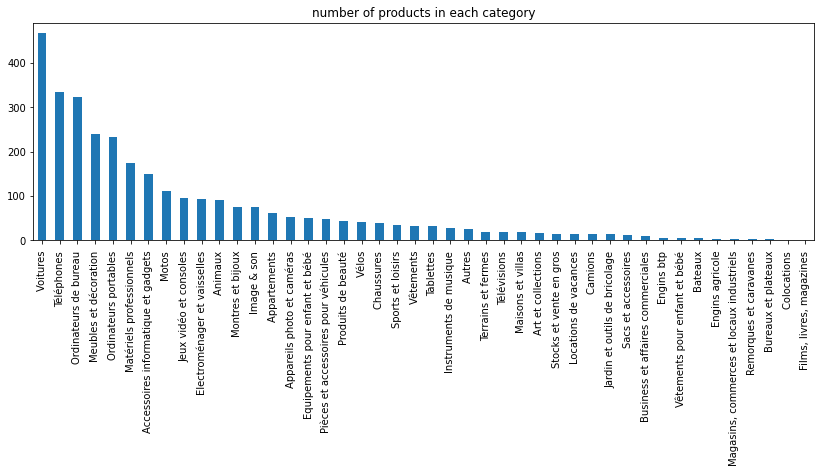

In [18]:
#nombre des annonces par catégorie :
products_categorys=data["Product_Category"].value_counts()
#Visualisation des nombre des annonces par catégorie :
plt.figure(figsize=(14,4))
products_categorys.plot.bar()
plt.title("number of products in each category")

In [19]:
#  min et max des prix et number des annonces par chaque catégorie
agg_categorys=data[["Product_Category","price"]].groupby(["Product_Category"]).agg(["max","min","count"])["price"]
agg_categorys

,max,min,count
Product_Category,,,
Accessoires informatique et gadgets,9999.0,40.0,149
Animaux,11000.0,1.0,91
Appareils photo et caméras,30000.0,1.0,53
Appartements,2300000.0,3.0,61
Art et collections,15000.0,140.0,16
Autres,180000.0,1.0,26
Bateaux,3500.0,1000.0,5
Bureaux et plateaux,3500.0,2200.0,2
Business et affaires commerciales,33000.0,40.0,9


#### 3)nombre des annonces dans chaque Region :

In [20]:
#nombre des regions dans avito dataset
nbr_regions=data["Region_address"].nunique()
print("nombre des regions dans avito dataset :",nbr_regions)

nombre des regions dans avito dataset : 16


In [21]:
#nombre d'annonces dans chaque Region :
product_regions=data["Region_address"].value_counts()
product_regions

Grand Casablanca                    986
Rabat-Salé-Zemmour-Zaër             483
Tanger-Tétouan                      357
Marrakech-Tensift-Al Haouz          286
Souss-Massa-Drâa                    194
Fès-Boulemane                       191
Meknès-Tafilalet                    167
Oriental                            117
Gharb-Chrarda-Beni Hssen            108
Doukkala–Abda                        93
Chaouia-Ouardigha                    55
Tadla-Azilal                         36
Taza-Al Hoceima-Taounate             30
Guelmim-Es Semara                    10
Oued Ed-Dahab-Lagouira                9
Laâyoune-Boujdour-Sakia El Hamra      7
Name: Region_address, dtype: int64

<AxesSubplot:title={'center':'number of products in each Region'}>

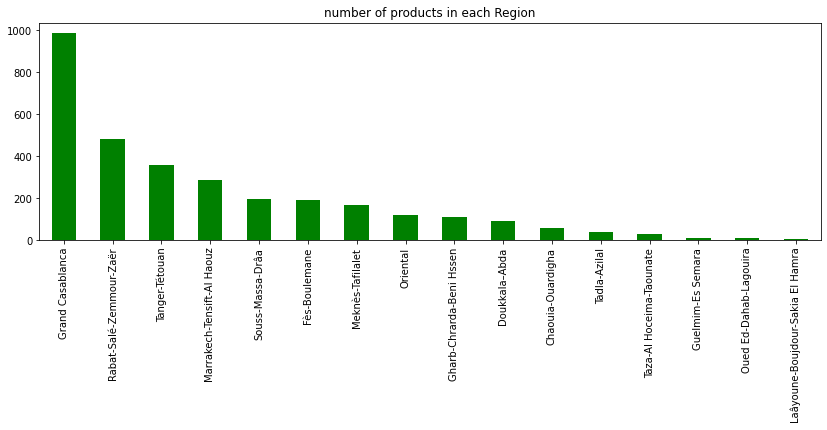

In [22]:
#Visualisation des nombre d'annonces par Region :
figure=plt.figure(figsize=(14,4))
plt.title("number of products in each Region")
product_regions.plot.bar(color="Green")

### nombre d'annonces par chaque ville

In [23]:
#nombre des villes dans avito dataset
nbr_citys=data["Local_address"].nunique()
print("nombre des viles dans avito dataset :",nbr_citys)

nombre des viles dans avito dataset : 108


In [24]:
#nombre d'annonces dans chaque ville :
product_citys=data["Local_address"].value_counts()
# affichage des 10 premier ville selon le nbr d'annonces:
product_citys.head(10)

Casablanca    914
Rabat         320
Tanger        302
Marrakech     267
Fès           183
Agadir        137
Meknès        136
Salé           95
Kénitra        92
Oujda          72
Name: Local_address, dtype: int64

<AxesSubplot:title={'center':"nombre d'annonces par ville"}, ylabel='Local_address'>

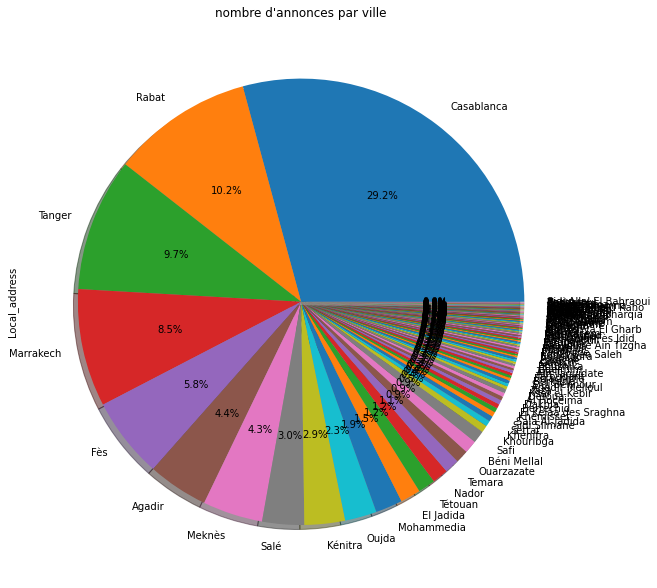

In [25]:
#Visualisation des nombre d'annonces par ville :
figure=plt.figure(figsize=(10,12))
product_citys.plot.pie( title="nombre d'annonces par ville", autopct='%1.1f%%',shadow=True)

# Etudes statistique sur les 2 premiers villes qu'ont le max des annonces   :

In [26]:
#les 2 primier villes qu'ont le max des annonces :
product_citys.head(2)

Casablanca    914
Rabat         320
Name: Local_address, dtype: int64

##  Casablanca city  :

In [27]:
# data frame qui contient les annonce de ville casablanca
Casablanca =data[data["Local_address"]=="Casablanca"] 
Casablanca.head()

,Product_name,Product_id,Product_Category,price,Phone_number,Professional_Publication,Region_address,Local_address
0,chambre a coucher,40008817,Meubles et décoration,1800.0,0693178738,False,Grand Casablanca,Casablanca
5,Need For Speed Heat Xbox One Neuf,39955729,Jeux vidéo et consoles,549.0,0661391011,True,Grand Casablanca,Casablanca
8,compte free fire,40008808,Jeux vidéo et consoles,170.0,0645595258,False,Grand Casablanca,Casablanca
13,Chaise Gamer Raidmax DK922 RGB,36694098,Matériels professionnels,3390.0,0648880609,True,Grand Casablanca,Casablanca
19,michael kors original,40008797,Montres et bijoux,1500.0,0663806165,False,Grand Casablanca,Casablanca


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'La distribution des prix des articles énoncer au Casablanca')

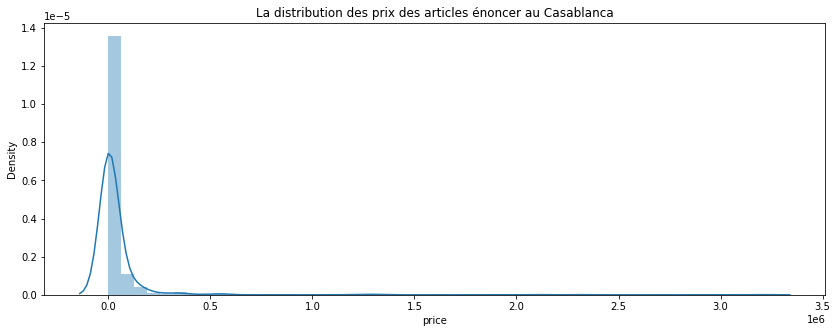

In [28]:
#La distribution des prix des articles énoncer au Casablanca
figure=plt.figure(figsize=(14,5))
sns.distplot(Casablanca["price"])
plt.title("La distribution des prix des articles énoncer au Casablanca")

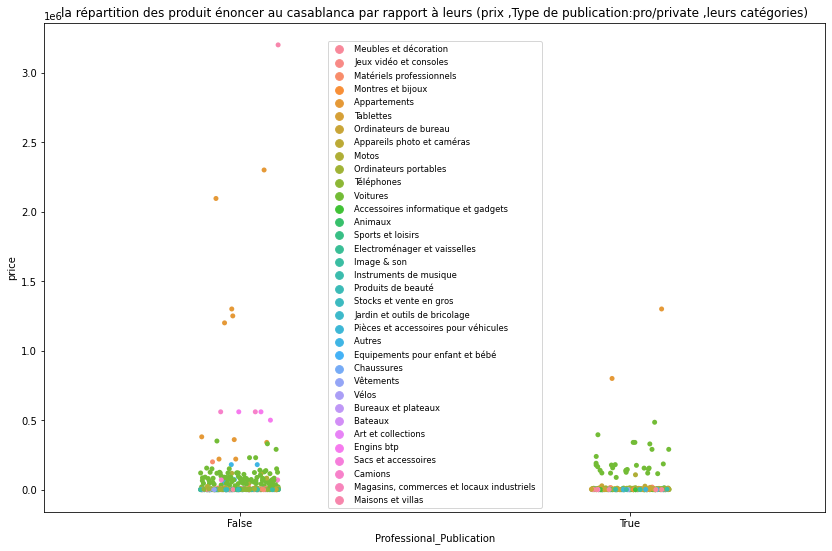

In [29]:
#Visualisation de la répartition des produit énoncer au casablanca par rapport à leurs (prix ,Type de publication:pro/private ,leurs catégories
figure=plt.figure(figsize=(14,9))
plt.title('la répartition des produit énoncer au casablanca par rapport à leurs (prix ,Type de publication:pro/private ,leurs catégories)')
sns.stripplot(x="Professional_Publication", y="price", data=Casablanca,hue="Product_Category")
plt.legend(fontsize='small')

In [30]:
#L'article le plus cher parmis les articles énoncer au casablanca
Casablanca[Casablanca["price"]==Casablanca["price"].max()]

,Product_name,Product_id,Product_Category,price,Phone_number,Professional_Publication,Region_address,Local_address
4232,VILLA A AIN SEBAA,39234834,Maisons et villas,3200000.0,0661217881,False,Grand Casablanca,Casablanca


In [31]:
#L'article le moins cher parmis les articles énoncer au casablanca
Casablanca[Casablanca["price"]==Casablanca["price"].min()]

,Product_name,Product_id,Product_Category,price,Phone_number,Professional_Publication,Region_address,Local_address
3279,بائع السمك بالجملة,39237195,Autres,1.0,0661632140,False,Grand Casablanca,Casablanca


0660175706    51
0644555444    37
0625214974    28
0616837054    22
0648880609    15
0661241227    14
0661537355    13
0643480063    12
0661801769    10
0637979532     9
Name: Phone_number, dtype: int64


<AxesSubplot:>

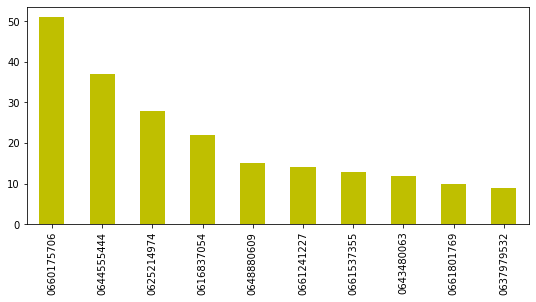

In [32]:
#Les 10 annonceurs les plus active au Casablanca (Leurs numéro de telephone)
print(Casablanca["Phone_number"].value_counts().head(10))
figure=plt.figure(figsize=(9,4))
Casablanca["Phone_number"].value_counts().head(10).plot.bar(color="y")

###### une petite étude statistique sur L'annonceur le plus active au casablanca (phone number = 0660175706)

In [33]:
# data frame qui contient les produit énoncer par annonceur le plus active de tél:0660175706
annonceur_active=data[data["Phone_number"]=="0660175706"] 

<AxesSubplot:title={'center':"catégories des articler poser par l'annonceur_active 0660175706"}, ylabel='Product_Category'>

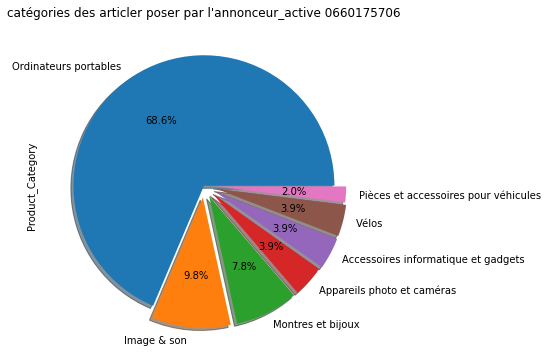

In [34]:
#les catégories des articler poser par l'annonceur_active "0660175706"
figure=plt.figure(figsize=(6,6))
annonceur_active["Product_Category"].value_counts().plot.pie( title="catégories des articler poser par l'annonceur_active 0660175706",autopct='%1.1f%%', explode=(0,0.09,0.09,0.09,0.1,0.1,0.09),shadow=True)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':"la distribution des prix des articler poser par l'annonceur_active 0660175706"}, xlabel='price', ylabel='Density'>

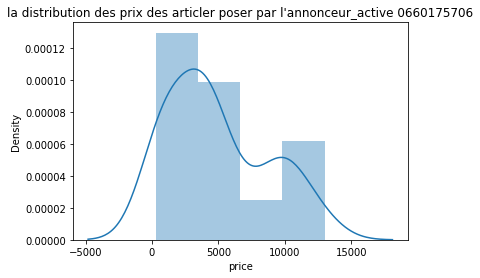

In [35]:
#la distribution des prix des articler poser par l'annonceur_active "0660175706"
plt.title("la distribution des prix des articler poser par l'annonceur_active 0660175706")
sns.distplot(annonceur_active["price"]) 

<AxesSubplot:title={'center':"La répartition des produits poser par l'annonceur_active 0660175706 par rapport à leurs (prix ,Type de publication:pro/private ,leurs catégories) "}, xlabel='Professional_Publication', ylabel='price'>

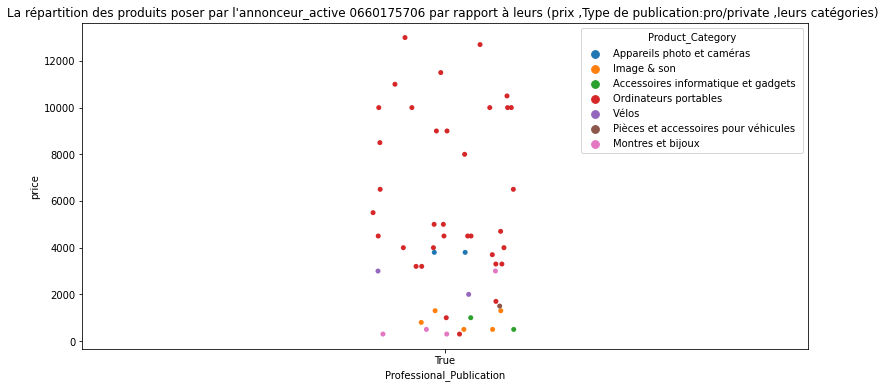

In [36]:
#La répartition des produits poser par annonceur_active 0660175706 par rapport à leurs (prix ,Type de publication:pro/private ,leurs catégories)
figure=plt.figure(figsize=(13,6))
plt.title("La répartition des produits poser par l'annonceur_active 0660175706 par rapport à leurs (prix ,Type de publication:pro/private ,leurs catégories) ")
sns.stripplot(x="Professional_Publication", y="price", data=annonceur_active,hue="Product_Category")

In [37]:
#L'article le plus cher de l'annoceur_active 0660175706 :
annonceur_active[annonceur_active["price"]==annonceur_active["price"].max()]

,Product_name,Product_id,Product_Category,price,Phone_number,Professional_Publication,Region_address,Local_address
1343,Acer Nitro 5 i7 9TH 16Go 1TB 512Go GTX 1650 Neuf,40007596,Ordinateurs portables,13000.0,0660175706,True,Grand Casablanca,Casablanca


In [38]:
#L'article le moins cher de l'annoceur_active 0660175706 :
annonceur_active[annonceur_active["price"]==annonceur_active["price"].min()]

,Product_name,Product_id,Product_Category,price,Phone_number,Professional_Publication,Region_address,Local_address
1119,Disques Durs Externe 1000Go 320Go HDD TBE,40007813,Ordinateurs portables,300.0,0660175706,True,Grand Casablanca,Casablanca
1221,Swatch Flik-Flak Enfants Neuve Original,40007704,Montres et bijoux,300.0,0660175706,True,Grand Casablanca,Casablanca
1280,Swatch Monalisa Le Louvre Unisex Neuve,40007643,Montres et bijoux,300.0,0660175706,True,Grand Casablanca,Casablanca


## Rabat city :

In [39]:
# data frame qui contient les annonce de ville Rabat
Rabat=data[data["Local_address"]=="Rabat"]
Rabat.head()

,Product_name,Product_id,Product_Category,price,Phone_number,Professional_Publication,Region_address,Local_address
116,abonnement 12Mois FHD 4K,39445202,Image & son,400.0,0638814391,False,Rabat-Salé-Zemmour-Zaër,Rabat
118,Boss 1513275 noir,40008718,Montres et bijoux,1300.0,0629314715,False,Rabat-Salé-Zemmour-Zaër,Rabat
124,Montre Femme Guess W0638L4,40008712,Montres et bijoux,1300.0,0629314715,False,Rabat-Salé-Zemmour-Zaër,Rabat
131,Hp Spectre x360 Convertible,40008704,Ordinateurs portables,5800.0,0658717976,False,Rabat-Salé-Zemmour-Zaër,Rabat
140,Guess w0801g1 argente homme,40008698,Montres et bijoux,1400.0,0629314715,False,Rabat-Salé-Zemmour-Zaër,Rabat


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'La distribution des prix des articles énoncer au Rabat')

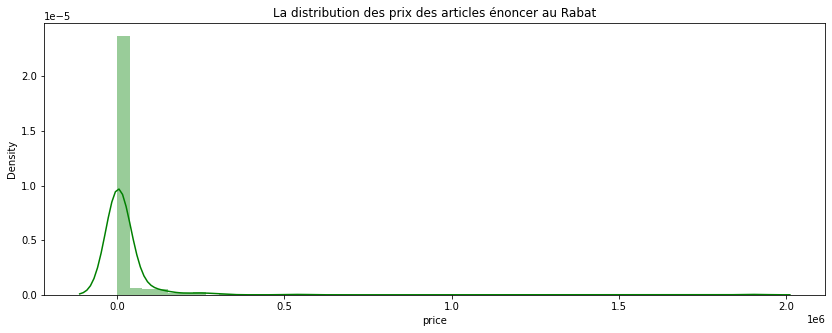

In [40]:
#La distribution des prix des articles énoncer au Rabat
figure=plt.figure(figsize=(14,5))
sns.distplot(Rabat["price"],color="Green")
plt.title("La distribution des prix des articles énoncer au Rabat")

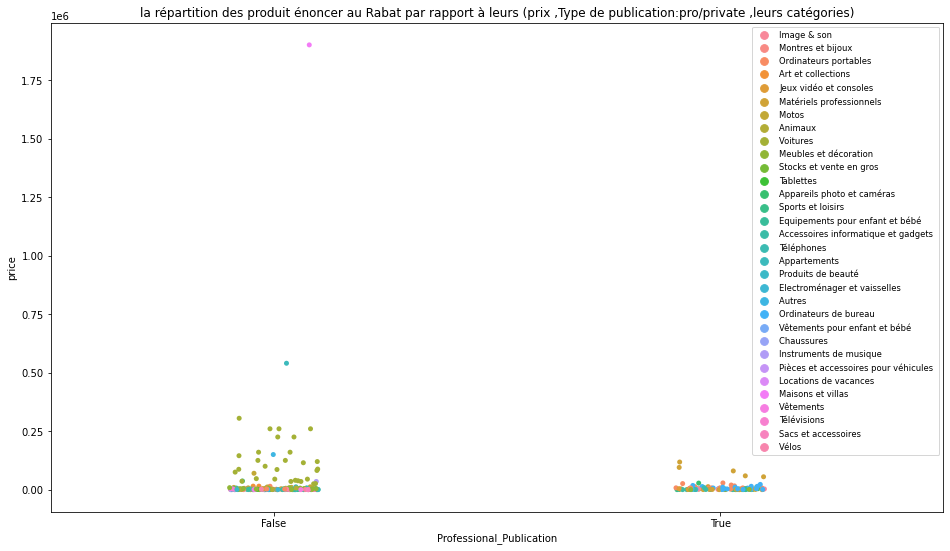

In [41]:
#Visualisation de la répartition des produit énoncer au Rabat par rapport à leurs (prix ,Type de publication:pro/private ,leurs catégories
figure=plt.figure(figsize=(16,9))
plt.title('la répartition des produit énoncer au Rabat par rapport à leurs (prix ,Type de publication:pro/private ,leurs catégories)')
sns.stripplot(x="Professional_Publication", y="price", data=Rabat,hue="Product_Category")
plt.legend(fontsize='small')

In [42]:
#L'article le plus cher parmis les articles énoncer au Rabat
Rabat[Rabat["price"]==Rabat["price"].max()]

,Product_name,Product_id,Product_Category,price,Phone_number,Professional_Publication,Region_address,Local_address
2706,منزل مطل علي شارع الكفاح,39240990,Maisons et villas,1900000.0,0661592440,False,Rabat-Salé-Zemmour-Zaër,Rabat


In [43]:
#L'article le moins cher parmis les articles énoncer au Rabat
Rabat[Rabat["price"]==Rabat["price"].min()]

,Product_name,Product_id,Product_Category,price,Phone_number,Professional_Publication,Region_address,Local_address
3263,aprelia 150cc,39237246,Motos,1.0,0651715065,False,Rabat-Salé-Zemmour-Zaër,Rabat


0665132665    14
0666166894    14
0601616261    11
0660726250    10
0661483388    10
0626914555    10
0629314715     9
0616213180     8
0640395875     6
0661537355     6
Name: Phone_number, dtype: int64


<AxesSubplot:>

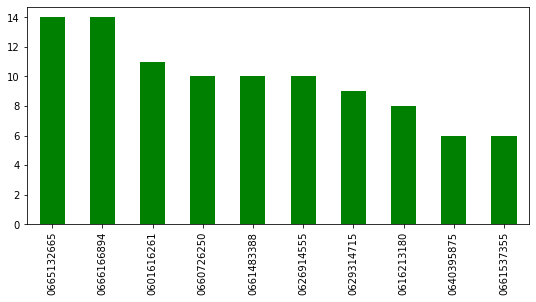

In [44]:
#Les 10 annonceurs les plus active au Casablanca (Leurs numéro de telephone)
print(Rabat["Phone_number"].value_counts().head(10))
figure=plt.figure(figsize=(9,4))
Rabat["Phone_number"].value_counts().head(10).plot.bar(color="Green")

##### une petite étude statistique L'annonceur le plus active au Rabat (phone number = 0665132665)

In [45]:
# data frame qui contient les produit énoncer par annonceur le plus active de tél:0660175706
annonceur_active=Rabat[Rabat["Phone_number"]=="0665132665"] 

<AxesSubplot:title={'center':"catégories des articler poser par l'annonceur_active 0665132665 au Rabat"}, ylabel='Product_Category'>

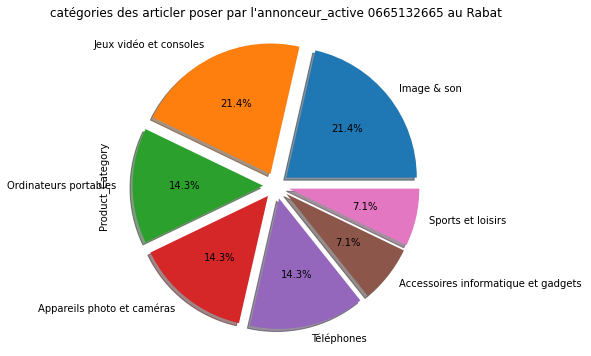

In [46]:
#les catégories des articler poser par l'annonceur_active "0665132665"
figure=plt.figure(figsize=(6,6))
annonceur_active["Product_Category"].value_counts().plot.pie( title="catégories des articler poser par l'annonceur_active 0665132665 au Rabat",autopct='%1.1f%%', explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1),shadow=True)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':"la distribution des prix des articler poser par l'annonceur_active 0665132665 au rabat"}, xlabel='price', ylabel='Density'>

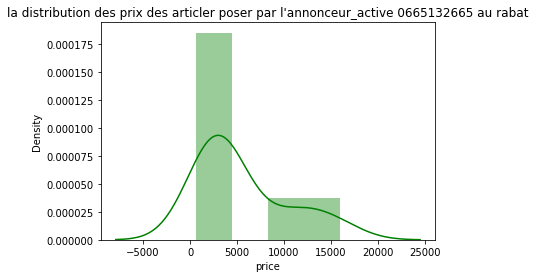

In [47]:
#la distribution des prix des articler poser par l'annonceur_active "0665132665" au rabat
plt.title("la distribution des prix des articler poser par l'annonceur_active 0665132665 au rabat")
sns.distplot(annonceur_active["price"],color="g") 

<AxesSubplot:title={'center':'La répartition des produits poser par annonceur_active 0665132665 au rabat par rapport à leurs (prix ,Type de publication:pro/private ,leurs catégories)'}, xlabel='Professional_Publication', ylabel='price'>

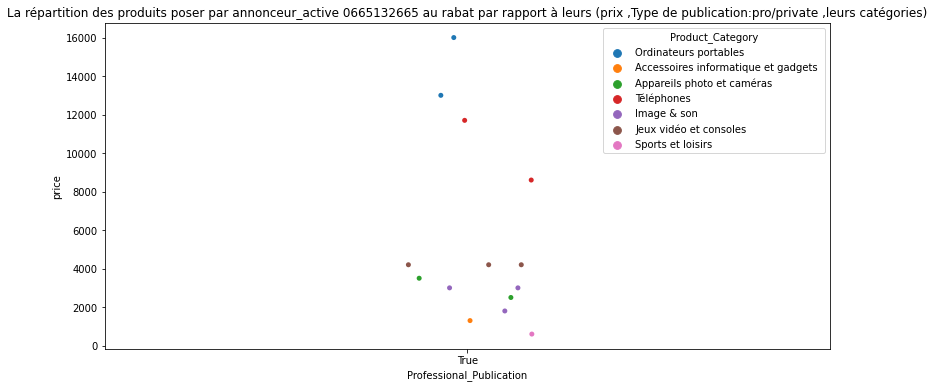

In [48]:
#La répartition des produits poser par annonceur_active 0665132665 au rabat par rapport à leurs (prix ,Type de publication:pro/private ,leurs catégories
figure=plt.figure(figsize=(13,6))
plt.title("La répartition des produits poser par annonceur_active 0665132665 au rabat par rapport à leurs (prix ,Type de publication:pro/private ,leurs catégories)")
sns.stripplot(x="Professional_Publication", y="price", data=annonceur_active,hue="Product_Category")

In [49]:
#L'article le plus cher de l'annoceur_active 0665132665  :
annonceur_active[annonceur_active["price"]==annonceur_active["price"].max()]

,Product_name,Product_id,Product_Category,price,Phone_number,Professional_Publication,Region_address,Local_address
704,HP Gaming Pavilion 15 dk0015nf I7,39549543,Ordinateurs portables,16000.0,0665132665,True,Rabat-Salé-Zemmour-Zaër,Rabat


In [50]:
#L'article le moins cher de l'annoceur_active 0665132665 :
annonceur_active[annonceur_active["price"]==annonceur_active["price"].min()]

,Product_name,Product_id,Product_Category,price,Phone_number,Professional_Publication,Region_address,Local_address
2500,Moulinet de Pêche Pflueger Press P30,37559729,Sports et loisirs,600.0,0665132665,True,Rabat-Salé-Zemmour-Zaër,Rabat
